# Ensemble Machine Learning Algorithms in Python with scikit-learn

> Ensembles can give you a boost in accuracy on your dataset.
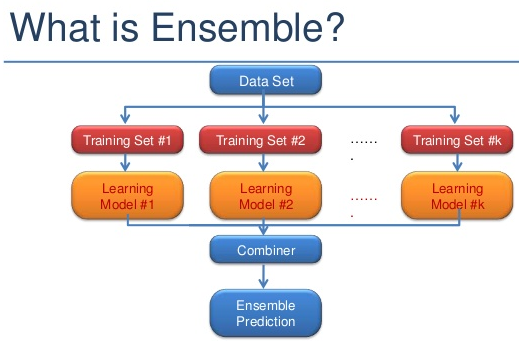
> In this notebook you will discover how you can create some of the most powerful types of ensembles in Python using scikit-learn.

# Combine Model Predictions Into Ensemble Predictions

The three most popular methods for combining the predictions from different models are:

- **Bagging**. Building multiple models (typically of the same type) from different subsamples of the training dataset.
- **Boosting**. Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.

***

This standard classification problem used to demonstrate each ensemble algorithm is the Pima Indians onset of diabetes dataset. It is a binary classification problem where all of the input variables are numeric and have differing scales.
***

# Pima Indians Diabetes Database

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have diabetes?

## 2. Content

> This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


## 3. Features

> The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

[Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

## Importing the libraries

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Loading the data

In [104]:
df = pd.read_csv('diabetes.csv')

In [105]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 1. Data Cleaning

A. Columns

In [106]:
df.columns = df.columns.str.replace( '/', '_' ).str.replace( ' ', '_' ).str.lower().str.strip()

In [190]:
df.head()
df.tail()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,gender
763,10,101,76,48,180,32.9,0.171,63,0,0
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,23,0,30.1,0.349,47,1,1
767,1,93,70,31,0,30.4,0.315,23,0,0


In [108]:
df['skinthickness'][df['skinthickness'] == 0]
#df['skinthickness'].mean()


2      0
5      0
7      0
9      0
10     0
      ..
757    0
758    0
759    0
762    0
766    0
Name: skinthickness, Length: 227, dtype: int64

In [123]:
df['skinthickness']


0      35
1      29
2      23
3      23
4      35
       ..
763    48
764    27
765    23
766    23
767    31
Name: skinthickness, Length: 768, dtype: int64

In [117]:

df.loc[ df['skinthickness'] == 0 | np.isnan(df['skinthickness']), 'skinthickness' ] = df['skinthickness'].median() 


In [121]:
#sk
df['skinthickness'][df['skinthickness'] == 99]

579    99
Name: skinthickness, dtype: int64

B. Rows

In [126]:
df.dtypes

pregnancies                   int64
glucose                       int64
bloodpressure                 int64
skinthickness                 int64
insulin                       int64
bmi                         float64
diabetespedigreefunction    float64
age                           int64
outcome                       int64
gender                       object
dtype: object

In [21]:
df.head(1)


,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [124]:
df['gender'] = np.where(df['pregnancies'] == 0, 'M','F') 

In [127]:
df['gender']

0      F
1      F
2      F
3      F
4      M
      ..
763    F
764    F
765    F
766    F
767    F
Name: gender, Length: 768, dtype: object

In [125]:
df.isna().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
gender                      0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [29]:
for col in df.columns: 
    if df[col].dtypes != 'O': 
        print(df[col].value_counts())
        print(df[col].nunique())

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: pregnancies, dtype: int64
17
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: glucose, Length: 136, dtype: int64
136
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: bloodpressure, dtype: int64
47
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25 

# 2. Data visualization

### Target Outcome

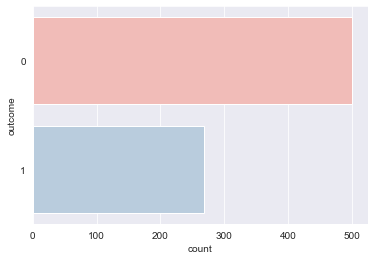

In [129]:
sns.set_style('darkgrid')
sns.countplot( y = 'outcome', data = df, palette = 'Pastel1' );

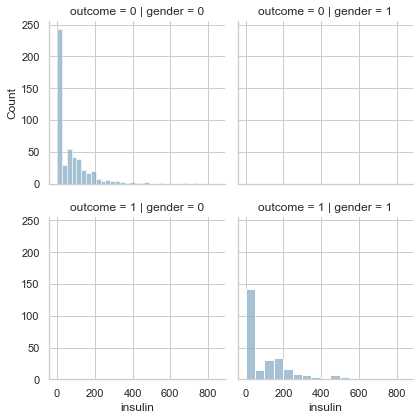

In [201]:
g = sns.FacetGrid(df, col='gender', row='outcome')

g.map_dataframe(sns.histplot, x= 'insulin');
                

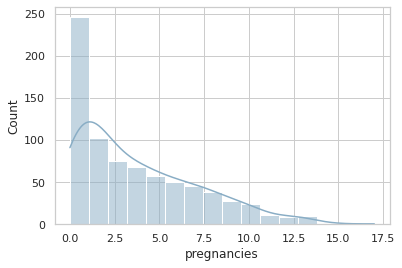

In [52]:
sns.set_theme(style="whitegrid", palette="twilight") 
sns.histplot(x = 'pregnancies', data = df, kde=True); 

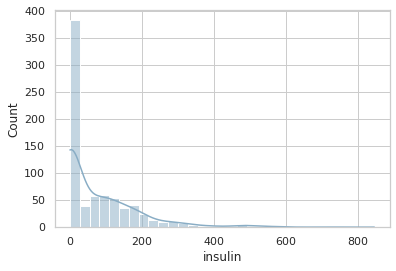

In [39]:
sns.set_theme(style="whitegrid", palette="twilight") 
sns.histplot(x = 'insulin', data = df, kde=True); 

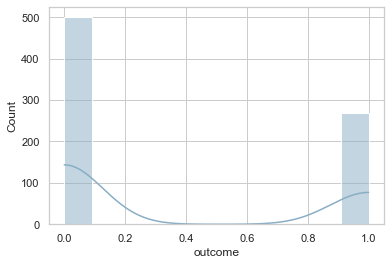

In [200]:
sns.set_theme(style="whitegrid", palette="twilight") 
sns.histplot(x = 'outcome', data = df, kde=True);

[Text(0, 0, '6'),
 Text(1, 0, '1'),
 Text(2, 0, '8'),
 Text(3, 0, '0'),
 Text(4, 0, '5'),
 Text(5, 0, '3'),
 Text(6, 0, '10'),
 Text(7, 0, '2'),
 Text(8, 0, '4'),
 Text(9, 0, '7'),
 Text(10, 0, '9'),
 Text(11, 0, '11'),
 Text(12, 0, '13'),
 Text(13, 0, '15'),
 Text(14, 0, '17'),
 Text(15, 0, '12'),
 Text(16, 0, '14')]

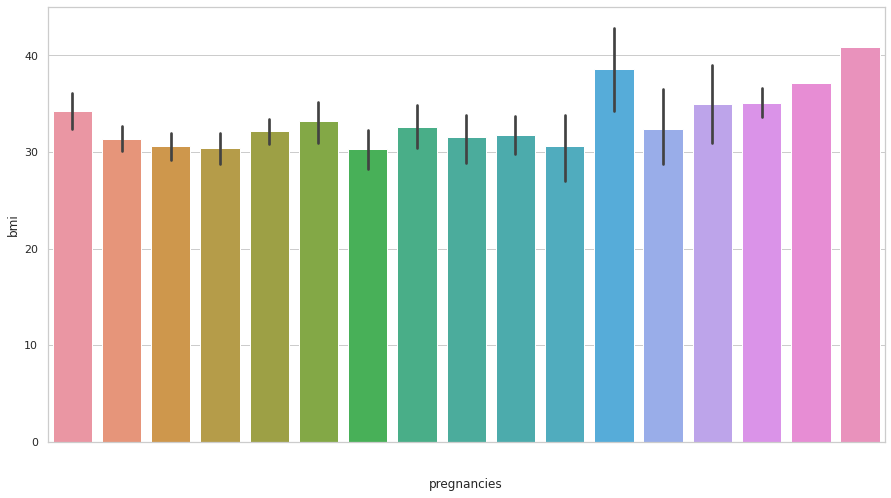

In [55]:
figure = plt.figure(figsize=(15,8)) 
sns.barplot(y = 'bmi', x = 'pregnancies', data = df).set_xticklabels(df.pregnancies.unique() ,rotation=45, size=14, color='white') 

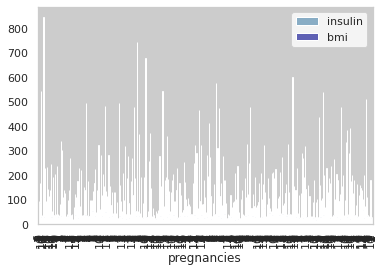

In [66]:
df.plot(x='pregnancies', y=['insulin','bmi'], kind="bar");

In [ ]:
# Visulazing the distibution of the Target


In [128]:
# Let's first check gender


0    F
Name: gender, dtype: object

In [ ]:
# Visualize the data is to use FacetGrid to plot multiple kedplots on one plot


# 3. Data Pre-Processing

- *Split the data into Train vs Test data with 70 vs 30% split*

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

In [166]:
df['gender'] = pd.get_dummies(df['gender'], drop_first=True) 
df['gender'].head() 

0    1
1    0
2    1
3    0
4    1
Name: gender, dtype: uint8

In [173]:

x=df.drop(columns=['outcome']) 
y= df.outcome

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42) 
lr_model = LogisticRegression() 
lr_model.fit(x_train, y_train) 
y_pred = lr_model.predict(x_test) 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        80

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



/home/abdulwahab/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [169]:
# Train vs Test split

In [170]:
# Dummy Encode for Catgeorical cols

# 4. Baseline Model



- Build a Logistic regression model & Use it metrics on test dataset as *Baseline Model*

In [ ]:
#Logistic regression model
from 

# 5. Bagging Algorithms
Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the sub-models.

The three bagging models covered were as follows:

1. Decision Trees
2. Random Forest
3. Extra Trees

# Choose one of those model & fit it to the training dataset

In [185]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [188]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

print('The Random Forest  Model R-Square {:.2f} %, MAPE is {:.2f} %'
      .format(r2_score(y_pred, y_test)*100, mean_absolute_percentage_error(y_test, y_pred)*100))


The Random Forest  Model R-Square 100.00 %, MAPE is 0.00 %


# 6. Boosting Algorithms
Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

1. AdaBoost
2. XGBoost 
***
# Choose one of those model & fit it to the training dataset

In [189]:
import xgboost as xgb

XG_model = xgb.XGBRegressor()
XG_model.fit(x_train, y_train)

y_pred = XG_model.predict(x_test)

print('The XG_Boost Model R-Square {:.2f} %, MAPE is {:.2f} %'.format(r2_score(y_pred, y_test)*100, mean_absolute_percentage_error(y_test, y_pred)*100))

The XG_Boost Model R-Square 100.00 %, MAPE is 7079770025115.15 %


## Summary
In this notebook we discovered ensemble machine learning algorithms for improving the performance of models on your problems.

## Please prepare Power Point file with 1-2 slides to summerize your learnings . 